# Adiabatic Flame Temperature

Code is ported (almost) verbatim from cantera example file `mix1.py` (distributed with cantera):
```
"""
Adiabatic flame temperature and equilibrium composition for a fuel/air mixture
as a function of equivalence ratio, including formation of solid carbon.
"""
```

In [5]:
import cantera as ct
import numpy as np
#import sys
#import csv

import matplotlib.pyplot as plt
%matplotlib notebook

### Problem Setup

Edit these parameters to change the initial temperature, the pressure, and
the phases in the mixture.

In [7]:
T = 300.0
P = 101325.0

# phases
gas = ct.Solution('gri30.xml')
carbon = ct.Solution('graphite.xml')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'CH4'

# equivalence ratio range
npoints = 50
phi = np.linspace(0.3, 3.5, npoints)

### Vary Equivalence Ratios

In [8]:
mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(npoints)
xeq = np.zeros((mix.n_species,npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi[i], fuel_species, 'O2:1.0, N2:3.76')

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='gibbs', max_steps=1000)

    tad[i] = mix.T
    print('At phi = {0:12.4g}, Tad = {1:12.4g}'.format(phi[i], tad[i]))
    xeq[:,i] = mix.species_moles

At phi =          0.3, Tad =         1066
At phi =       0.3653, Tad =         1208
At phi =       0.4306, Tad =         1343
At phi =       0.4959, Tad =         1472
At phi =       0.5612, Tad =         1595
At phi =       0.6265, Tad =         1713
At phi =       0.6918, Tad =         1825
At phi =       0.7571, Tad =         1931
At phi =       0.8224, Tad =         2030
At phi =       0.8878, Tad =         2119
At phi =       0.9531, Tad =         2192
At phi =        1.018, Tad =         2232
At phi =        1.084, Tad =         2220
At phi =        1.149, Tad =         2176
At phi =        1.214, Tad =         2125
At phi =         1.28, Tad =         2073
At phi =        1.345, Tad =         2022
At phi =         1.41, Tad =         1972
At phi =        1.476, Tad =         1923
At phi =        1.541, Tad =         1875
At phi =        1.606, Tad =         1828
At phi =        1.671, Tad =         1782
At phi =        1.737, Tad =         1737
At phi =        1.802, Tad =      

In [9]:
# # write output CSV file for importing into Excel
# csv_file = 'adiabatic.csv'
# with open(csv_file, 'w') as outfile:
#     writer = csv.writer(outfile)
#     writer.writerow(['phi','T (K)'] + mix.species_names)
#     for i in range(npoints):
#         writer.writerow([phi[i], tad[i]] + list(xeq[:,i]))
# print('Output written to {0}'.format(csv_file))

<IPython.core.display.Javascript object>


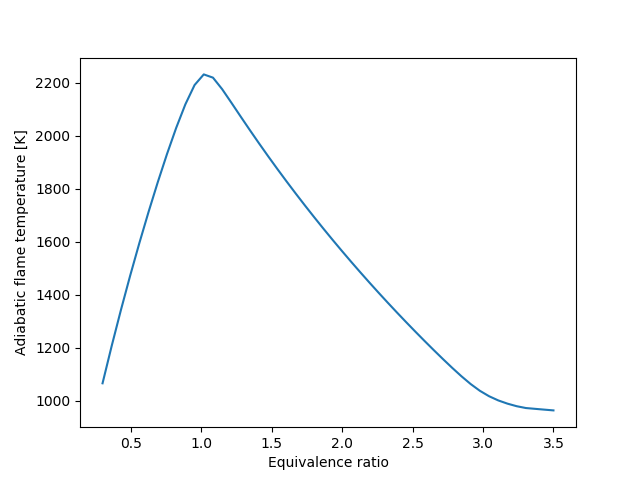

Text(0,0.5,'Adiabatic flame temperature [K]')

In [10]:
plt.plot(phi, tad)
plt.xlabel('Equivalence ratio')
plt.ylabel('Adiabatic flame temperature [K]')